# 🐦 Twitter Sentiment Analyzer
Este proyecto analiza el sentimiento de tweets sobre una palabra clave usando Python, snscrape y TextBlob.

In [6]:
import pandas as pd

# Cargar tweets desde el archivo CSV
df = pd.read_csv("tweets_IA.csv")
df.head()


,Fecha,Texto
0,2025-05-20,La IA está revolucionando la forma en que trab...
1,2025-05-20,Me da miedo el futuro con tanta inteligencia a...
2,2025-05-20,Hoy he probado ChatGPT y estoy impresionado.
3,2025-05-20,La inteligencia artificial destruirá empleos.
4,2025-05-20,La IA es una herramienta increíble para automa...


In [ ]:
# 1. Importar librerías
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
# 2. Recoger tweets con una palabra clave
query = "IA"
tweets = []

for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i > 100:
        break
    tweets.append([tweet.date, tweet.content])

df = pd.DataFrame(tweets, columns=["Fecha", "Texto"])
df.head()

In [ ]:
# 3. Analizar sentimientos
def obtener_sentimiento(texto):
    return TextBlob(texto).sentiment.polarity

df["Sentimiento"] = df["Texto"].apply(obtener_sentimiento)
df.head()

In [ ]:
# 4. Clasificar como Positivo / Negativo / Neutro
def clasificar_polaridad(p):
    if p > 0:
        return "Positivo"
    elif p < 0:
        return "Negativo"
    else:
        return "Neutro"

df["Clasificación"] = df["Sentimiento"].apply(clasificar_polaridad)
df.head()

In [ ]:
# 5. Graficar resultados
df["Clasificación"].value_counts().plot(kind="bar", title="Análisis de sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.show()

In [4]:
import json
import pandas as pd

# Leer el archivo JSON generado desde snscrape
tweets_data = []

with open("tweets.json", "r", encoding="utf-8") as f:
    for line in f:
        tweet = json.loads(line)
        tweets_data.append([tweet['date'], tweet['content']])

df = pd.DataFrame(tweets_data, columns=["Fecha", "Texto"])
df.head()


,Fecha,Texto


In [8]:
with open("tweets.json", "r", encoding="utf-8") as f:
    lineas = f.readlines()

print(f"Número de líneas en el archivo: {len(lineas)}")


Número de líneas en el archivo: 0


In [9]:
from textblob import TextBlob

# Función para obtener la polaridad del texto
def obtener_sentimiento(texto):
    return TextBlob(texto).sentiment.polarity

# Aplicar la función a cada tweet
df["Sentimiento"] = df["Texto"].apply(obtener_sentimiento)

# Ver los primeros resultados
df[["Texto", "Sentimiento"]].head()


,Texto,Sentimiento
0,La IA está revolucionando la forma en que trab...,0.0
1,Me da miedo el futuro con tanta inteligencia a...,-0.6
2,Hoy he probado ChatGPT y estoy impresionado.,0.0
3,La inteligencia artificial destruirá empleos.,-0.6
4,La IA es una herramienta increíble para automa...,0.0


In [10]:
# Función para clasificar según polaridad
def clasificar_sentimiento(polaridad):
    if polaridad > 0:
        return "Positivo"
    elif polaridad < 0:
        return "Negativo"
    else:
        return "Neutro"

# Aplicar clasificación
df["Clasificación"] = df["Sentimiento"].apply(clasificar_sentimiento)

# Ver los primeros resultados
df[["Texto", "Sentimiento", "Clasificación"]].head()


,Texto,Sentimiento,Clasificación
0,La IA está revolucionando la forma en que trab...,0.0,Neutro
1,Me da miedo el futuro con tanta inteligencia a...,-0.6,Negativo
2,Hoy he probado ChatGPT y estoy impresionado.,0.0,Neutro
3,La inteligencia artificial destruirá empleos.,-0.6,Negativo
4,La IA es una herramienta increíble para automa...,0.0,Neutro


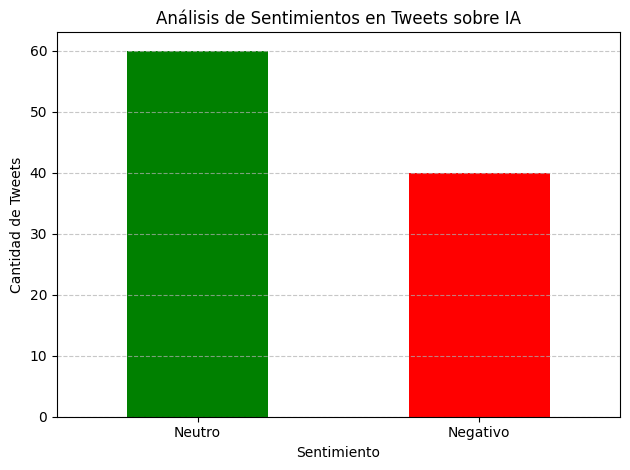

In [11]:
import matplotlib.pyplot as plt

# Contar cuántos hay de cada tipo
conteo = df["Clasificación"].value_counts()

# Crear gráfico de barras
conteo.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Análisis de Sentimientos en Tweets sobre IA")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Tweets")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

